In [218]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [219]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [220]:
# File to Load (Remember to Change These)
mouse_dataload = "mouse_drugdata.csv"
trial_dataload = "trial_data.csv"

In [221]:
# Read the Mouse and Drug Data and the Clinical Trial Data
mousedata_df = pd.read_csv(mouse_dataload)

trialdata_df = pd.read_csv(trial_dataload)




In [222]:
# Combine the data into a single dataset
df_total = pd.merge(mousedata_df, trialdata_df, how='left', on=["Mouse ID", "Mouse ID"])


In [223]:
# Display the data table for preview
df_total.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [224]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumorvolume_mean = df_total.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"] 

# Convert to DataFrame
tumorvolumemean_df = pd.DataFrame(tumorvolume_mean)

# Preview DataFrame
tumorvolumemean_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [225]:
 # Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumorvolume_se = df_total.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]

# Convert to DataFrame
tumorvolumese_df = pd.DataFrame(tumorvolume_se)

# Preview DataFrame
tumorvolumese_df.head() 

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [226]:
# Minor Data Munging to Re-Format the Data Frames

# Perform index function
tumorvolumemean_df = tumorvolumemean_df.reset_index()
tumorvolumese_df = tumorvolumese_df.reset_index()


# Perform pivot function
tumorvolumemean_df_pivot = tumorvolumemean_df.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
tumorvolumese_df_pivot = tumorvolumese_df.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]


# Preview that Reformatting worked
tumorvolumese_df_pivot.head()




Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


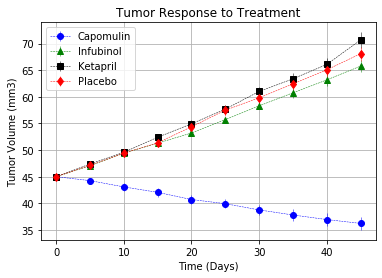

In [227]:
# Generate the Plot (with Error Bars)
plt.errorbar(tumorvolumemean_df_pivot.index, tumorvolumemean_df_pivot["Capomulin"], 
             yerr=tumorvolumese_df_pivot["Capomulin"], color="b", marker="o", 
             markersize=6, linestyle="dashed", linewidth=0.50, label="Capomulin")

plt.errorbar(tumorvolumemean_df_pivot.index, tumorvolumemean_df_pivot["Infubinol"], 
             yerr=tumorvolumese_df_pivot["Infubinol"], color="g", marker="^", 
             markersize=6, linestyle="dashed", linewidth=0.50, label="Infubinol")

plt.errorbar(tumorvolumemean_df_pivot.index, tumorvolumemean_df_pivot["Ketapril"], 
             yerr=tumorvolumese_df_pivot["Ketapril"], color="k", marker="s", 
             markersize=6, linestyle="dashed", linewidth=0.50, label="Ketapril")

plt.errorbar(tumorvolumemean_df_pivot.index, tumorvolumemean_df_pivot["Placebo"], 
             yerr=tumorvolumese_df_pivot["Placebo"], color="r", marker="d", 
             markersize=6, linestyle="dashed", linewidth=0.50, label="Placebo")

# Title
plt.title("Tumor Response to Treatment")

# Labels
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")

# Visual formatting
plt.grid(True)
plt.legend(loc="best", fontsize="medium", fancybox=True)

# Save the Figure
plt.savefig("part1.png")

# Show the Figure
plt.show()


In [228]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metsite_mean = df_total.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"]

# Convert to DataFrame
metsitemean_df = pd.DataFrame(metsite_mean)

# Preview DataFrame
metsitemean_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [229]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metsite_se = df_total.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]

# Convert to DataFrame
metsitese_df = pd.DataFrame(metsite_se)

# Preview DataFrame
metsitese_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [230]:
# Minor Data Munging to Re-Format the Data Frames

# Perform index function
metsitemean_df = metsitemean_df.reset_index()
metsitese_df = metsitese_df.reset_index()

# Perform pivot function
metsitemean_df_pivot = metsitemean_df.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]
metsitese_df_pivot = metsitese_df.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

# Preview that Reformatting worked
metsitemean_df_pivot.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


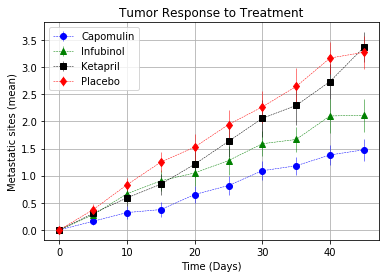

In [231]:
# Generate the Plot (with Error Bars) containing the four studied medications;
plt.errorbar(metsitemean_df_pivot.index, metsitemean_df_pivot["Capomulin"], 
             yerr=metsitese_df_pivot["Capomulin"], color="b", marker="o", 
             markersize=6, linestyle="dashed", linewidth=0.50, label="Capomulin")

plt.errorbar(metsitemean_df_pivot.index, metsitemean_df_pivot["Infubinol"], 
             yerr=metsitese_df_pivot["Infubinol"], color="g", marker="^", 
             markersize=6, linestyle="dashed", linewidth=0.50, label="Infubinol")

plt.errorbar(metsitemean_df_pivot.index, metsitemean_df_pivot["Ketapril"], 
             yerr=metsitese_df_pivot["Ketapril"], color="k", marker="s", 
             markersize=6, linestyle="dashed", linewidth=0.50, label="Ketapril")

plt.errorbar(metsitemean_df_pivot.index, metsitemean_df_pivot["Placebo"], 
             yerr=metsitese_df_pivot["Placebo"], color="r", marker="d", 
             markersize=6, linestyle="dashed", linewidth=0.50, label="Placebo")

# Title
plt.title("Tumor Response to Treatment")

# Labels
plt.ylabel("Metastatic sites (mean)")
plt.xlabel("Time (Days)")

# Grid
plt.grid(True)

#Legend
plt.legend(loc="best", fontsize="medium", fancybox=True)

# Save the Figure
plt.savefig("part2.png")

# Show the Figure
plt.show()

In [232]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = df_total.groupby(["Drug", "Timepoint"]).count()["Mouse ID"]

# Convert to DataFrame
micecount_df = pd.DataFrame(mice_count)

# Preview DataFrame
micecount_df.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [233]:
# Minor Data Munging to Re-Format the Data Frame

#Index function
micecount_df = micecount_df.reset_index()

#Pivot function
micecountdf_pivot = micecount_df.pivot(index="Timepoint", columns="Drug")["Mouse ID"]

# Preview the Data Frame
micecountdf_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


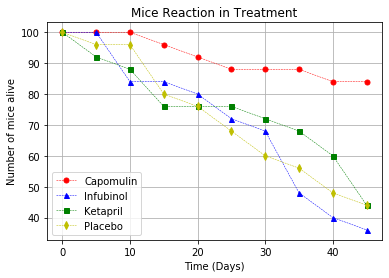

In [234]:
# Generate the Plot (Accounting for percentages)
plt.plot(micecountdf_pivot.index, micecountdf_pivot["Capomulin"]/25 * 100, color="r", 
         marker="o", markersize=5, linestyle="dashed", linewidth=0.50, label="Capomulin")

plt.plot(micecountdf_pivot.index, micecountdf_pivot["Infubinol"]/25 * 100, color="b", 
         marker="^", markersize=5, linestyle="dashed", linewidth=0.50, label="Infubinol")

plt.plot(micecountdf_pivot.index, micecountdf_pivot["Ketapril"]/25 * 100, color="g", 
         marker="s", markersize=5, linestyle="dashed", linewidth=0.50, label="Ketapril")

plt.plot(micecountdf_pivot.index, micecountdf_pivot["Placebo"]/25 * 100, color="y", 
         marker="d", markersize=5, linestyle="dashed", linewidth=0.50, label="Placebo")

# Title
plt.title("Mice Reaction in Treatment")

# Labels
plt.ylabel("Number of mice alive")
plt.xlabel("Time (Days)")

# Grid
plt.grid(True)

#Legend
plt.legend(loc="best", fontsize="medium", fancybox=True)

# Save the Figure
plt.savefig("part3.png")

# Show the Figure
plt.show()

In [235]:
# Calculate the percent changes for each drug
tumorpctchange =  ((tumorvolumemean_df_pivot.iloc[-1] - tumorvolumemean_df_pivot.iloc[0]) / 
                   tumorvolumemean_df_pivot.iloc[0]) * 100


# Display the data to confirm
tumorpctchange


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

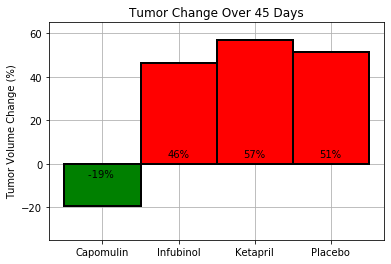

In [236]:
 # Store all Relevant Percent Changes into a Tuple
pctchanges = (tumorpctchange["Capomulin"], tumorpctchange["Infubinol"],
               tumorpctchange["Ketapril"], tumorpctchange["Placebo"])

# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
ind = np.arange(len(pctchanges))  
width = 1
rectsPass = ax.bar(ind[0], pctchanges[0], width, color='green', edgecolor="black", linewidth=2, zorder=3)
rectsFail = ax.bar(ind[1:], pctchanges[1:], width, color='red', edgecolor="black", linewidth=2, zorder=3)

# Orient widths. Add labels, tick marks, etc. 
ax.set_title("Tumor Change Over 45 Days")
ax.set_ylabel("Tumor Volume Change (%)")
ax.set_ylim([-35,65])
ax.set_autoscaley_on(False)
ax.grid(zorder=0)

#Position ticks and labels,
ax.set_xticklabels(("Capomulin", "Infubinol", "Ketapril", "Placebo"))
ax.set_xticks(ind)

# Use functions to label the percentages of changes
def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -7,
        '%d%% ' % int(height), ha='center', va='bottom', color="black")

def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 2,
                '%d%%' % int(height), ha='center', va='bottom', color="black")

# Call functions to implement the function calls
autolabelPass(rectsPass)
autolabelFail(rectsFail)

# Save the Figure
fig.savefig("part4.png")

# Show the Figure
fig.show()